# The 2020 US Presidential Election
With this project, I wanted to take a look at the presidential results and visualize them. 

The key things of interest for me would be:

* The actual margins of victory for each state 
* The the states with the highest concentration of voters in the US.
* The voters weight in comparison to the Electoral College vote

I will be using plotly choropleth maps to visualize the data

**NOTE: Choropleth interactive maps will not show up in github please use link below**

https://nbviewer.jupyter.org/github/tenor2000/gregoryjung.github.io/blob/main/2020%20Election%20Project/2020%20Election%20info.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
election_data = pd.read_csv("1976-2020-president.csv")

In [3]:
election_data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


**Although I am interested in many of the previous elections, for this project I am going to focus on the 2020 election.**

In [4]:
election2020 = election_data[election_data['year'] == 2020]

In [5]:
election2020.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
3742,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,25176,2323282,20210113,NaN,LIBERTARIAN
3743,2020,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,7312,2323282,20210113,NaN,OTHER
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT


In [6]:
election2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 3740 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              547 non-null    int64  
 1   state             547 non-null    object 
 2   state_po          547 non-null    object 
 3   state_fips        547 non-null    int64  
 4   state_cen         547 non-null    int64  
 5   state_ic          547 non-null    int64  
 6   office            547 non-null    object 
 7   candidate         526 non-null    object 
 8   party_detailed    427 non-null    object 
 9   writein           544 non-null    object 
 10  candidatevotes    547 non-null    int64  
 11  totalvotes        547 non-null    int64  
 12  version           547 non-null    int64  
 13  notes             0 non-null      float64
 14  party_simplified  547 non-null    object 
dtypes: float64(1), int64(7), object(7)
memory usage: 68.4+ KB


## Cleaning up the data
While the data is complete, I'm going to eliminate the third party candidates and focus on Biden and Trump.

In [13]:
df_Trump = election2020.loc[election2020['candidate'] == 'TRUMP, DONALD J.']
df_Biden = election2020.loc[election2020['candidate'] == 'BIDEN, JOSEPH R. JR']

In [14]:
BidenPopVote = df_Biden['candidatevotes'].sum()
TrumpPopVote = df_Trump['candidatevotes'].sum()
totalVote = df_Biden['totalvotes'].sum()

**The bottom line this election**

In [15]:
print(f"Popular Vote Totals for Biden: {BidenPopVote} with {round((BidenPopVote / totalVote)*100, 2)} percent of the electorate.")
print(f"Popular Vote Totals for Trump: {TrumpPopVote} with {round((TrumpPopVote / totalVote)*100, 2)} percent of the electorate.")

Popular Vote Totals for Biden: 81268908 with 51.26 percent of the electorate.
Popular Vote Totals for Trump: 74216146 with 46.82 percent of the electorate.


**Taking the two separate Trump and Biden dataframes and combining them with only the information that I am interested in.**

In [18]:
df1 = df_Trump[['state','state_po', 'candidatevotes']]
df2 = df_Biden[['state_po', 'candidatevotes', 'totalvotes']]
h2h_results = pd.merge(df1, df2, on='state_po')
h2h_results = h2h_results.set_axis(["State","State PO", "Trump", "Biden", "Total"], axis=1)

In [21]:
#Cleaning up the all uppercase state names
h2h_results['State'] = h2h_results['State'].apply(lambda x: x.title())

In [24]:
h2h_results.head()

,State,State PO,Trump,Biden,Total
0,Alabama,AL,1441170,849624,2323282
1,Alaska,AK,189951,153778,359530
2,Arizona,AZ,1661686,1672143,3387326
3,Arkansas,AR,760647,423932,1219069
4,California,CA,6006429,11110250,17500881


In [25]:
# Calculate Margin of Victory %
h2h_results['MOV %'] = ((h2h_results['Trump'] - h2h_results['Biden']) / h2h_results['Total']) * 100

In [49]:
h2h_results.head(10)

,State,State PO,Trump,Biden,Total,MOV %
0,Alabama,AL,1441170,849624,2323282,25.461653
1,Alaska,AK,189951,153778,359530,10.061191
2,Arizona,AZ,1661686,1672143,3387326,-0.308710
3,Arkansas,AR,760647,423932,1219069,27.620668
4,California,CA,6006429,11110250,17500881,-29.163223
5,Colorado,CO,1364607,1804352,3279980,-13.406942
6,Connecticut,CT,714717,1080831,1823857,-20.073613
7,Delaware,DE,200603,296268,504346,-18.968129
8,District Of Columbia,DC,18586,317323,344356,-86.752373
9,Florida,FL,5668731,5297045,11067456,3.358369


# US Election 2020 Margin of Victory Map

Let's create an election map that highlight the margins of victory. With the margins we can tell visually which is state is a Republican State (Red) and which is Democratic State (Blue) and also which states fall between (Purple).

In [27]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [81]:
data = dict(type = 'choropleth',
        locations = h2h_results['State PO'],
        locationmode = 'USA-states',
        z = h2h_results['MOV %'],
        text = h2h_results['State PO'],
        zmax = 20, # Anything above would be solidly for Trump
        zmid = 0,
        zmin = -20, # Anything below would be solidly for Biden
        colorbar = {'title' : 'Trump MoV'},
        colorscale = 'bluered'
        )

In [82]:
layout = dict(
    title = '2020 Electoral Map % Margin of Victory',
    geo = dict(scope='usa',showlakes=True,lakecolor='rgb(85,173,240)')
        )

In [83]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=True)

<AxesSubplot:xlabel='State PO', ylabel='MOV %'>

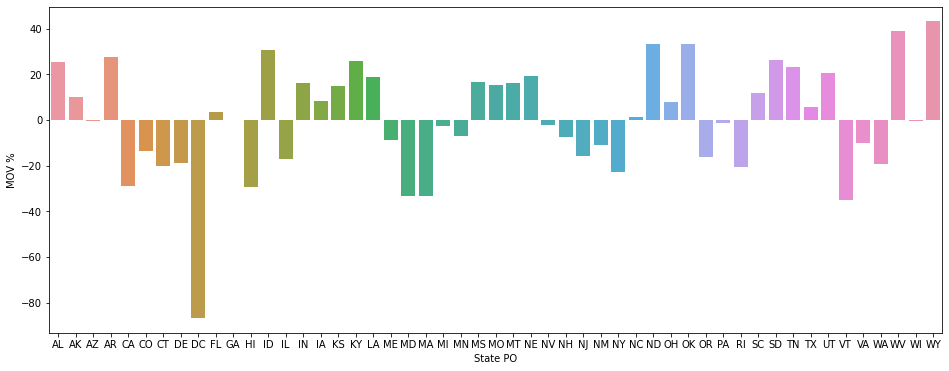

In [116]:
plt.figure(figsize=(16, 6))
sns.barplot(x='State PO',y='MOV %', data=h2h_results)

# US Election 2020 Total Voters Map
Lets take a look at the US map and see which states have the most voters during the 2020 election.

In [37]:
data2 = dict(type = 'choropleth',
        locations = h2h_results['State PO'],
        locationmode = 'USA-states',
        z = h2h_results['Total'],
        text = h2h_results['State PO'],
        colorbar = {'title' : 'Total Voters'},
        colorscale = 'blues'
      )

In [38]:
layout = dict(
    title = '2020 Total Voters for each state',
    geo = dict(scope='usa',showlakes=True,lakecolor='rgb(85,173,240)'))

In [39]:
choromap = go.Figure(data = [data2],layout = layout)
iplot(choromap,validate=True)

<AxesSubplot:xlabel='State PO', ylabel='Total'>

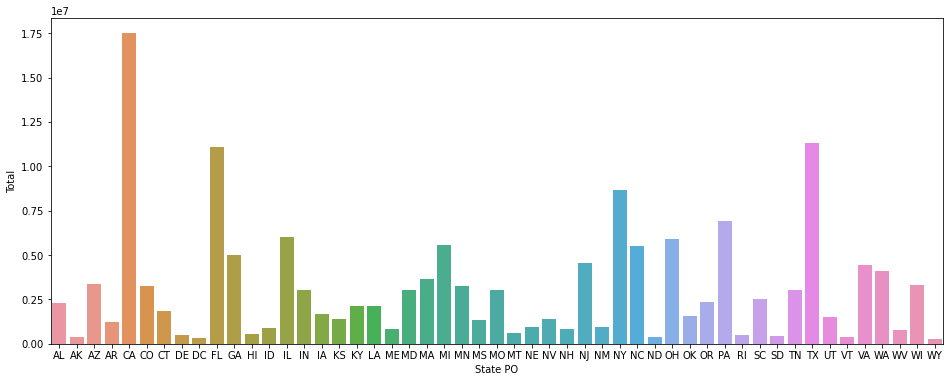

In [115]:
plt.figure(figsize=(16, 6))
sns.barplot(x='State PO',y='Total', data=h2h_results)

# US Election 2020 Electoral College
Lets take a look at voter numbers weighted by the electoral college votes. Basically, I want to see how much weight a voter from each state has on the electoral college. First we will need to bring in data of the 2020 electoral college numbers. Even though Electoral College votes are dependent on total population, I am weighting them against Total number of Votes.

In [40]:
EC_num = pd.read_csv('Electoral_College.csv')

In [41]:
EC_num = EC_num[EC_num['Year']==2020]

In [88]:
EC_num.head()

,Year,State,Votes
58,2020,Alabama,9.0
117,2020,Alaska,3.0
176,2020,Arizona,11.0
235,2020,Arkansas,6.0
294,2020,California,55.0


In [50]:
#Change the name 'D.C.' to match the other dataframe for merging.
EC_num['State'][471] = 'District Of Columbia'

In [51]:
h2h_results = pd.merge(h2h_results, EC_num, on = 'State')

In [86]:
#Weighted results are multiplied by 1000000 to make easier calculations to compare.
h2h_results['weighted'] = (h2h_results['Votes'] / h2h_results['Total'])*1000000

**Lets view the highest vs the lowest weighted score.**

In [89]:
h2h_results.sort_values(by='weighted', ascending=False).head()

,State,State PO,Trump,Biden,Total,MOV %,Year,Votes,weighted
50,Wyoming,WY,193559,73491,278503,43.111923,2020,3.0,10.771877
8,District Of Columbia,DC,18586,317323,344356,-86.752373,2020,3.0,8.711914
1,Alaska,AK,189951,153778,359530,10.061191,2020,3.0,8.344227
34,North Dakota,ND,235595,114902,361819,33.357286,2020,3.0,8.291439
45,Vermont,VT,112704,242820,370968,-35.074723,2020,3.0,8.086951


In [90]:
h2h_results.sort_values(by='weighted').head()

,State,State PO,Trump,Biden,Total,MOV %,Year,Votes,weighted
9,Florida,FL,5668731,5297045,11067456,3.358369,2020,29.0,2.620295
33,North Carolina,NC,2758773,2684292,5524802,1.348121,2020,15.0,2.715029
5,Colorado,CO,1364607,1804352,3279980,-13.406942,2020,9.0,2.743919
22,Michigan,MI,2649852,2804040,5539302,-2.783528,2020,16.0,2.888451
38,Pennsylvania,PA,3377674,3458229,6915283,-1.164884,2020,20.0,2.892145


**Notice that the highest weighted votes are in very small populated states and DC. A typical Wyoming voter has almost 5 times the voting power than that of a Florida voter.**

In [69]:
data3 = dict(type = 'choropleth',
        locations = h2h_results['State PO'],
        locationmode = 'USA-states',
        z = h2h_results['weighted'],
        text = h2h_results['State PO'],
        colorbar = {'title' : 'Weighted Votes'},
        colorscale = 'reds'
      )

In [117]:
layout = dict(
    title = '2020 Weighted Electoral College Vote',
    geo = dict(scope='usa',showlakes=True,lakecolor='rgb(85,173,240)'))

In [118]:
choromap = go.Figure(data = [data3],layout = layout)
iplot(choromap,validate=True)

<AxesSubplot:xlabel='State PO', ylabel='weighted'>

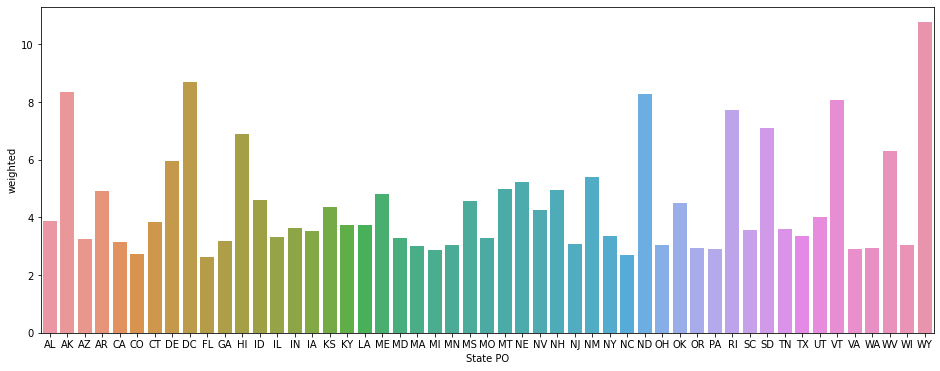

In [107]:
plt.figure(figsize=(16, 6))
sns.barplot(x="State PO", y="weighted", data=h2h_results)